## TOLNet
This notebook details how to use the TOLNet API to fetch and plot ozone data with various filters, such as processing type and instrument group/location.


## Table of Contents:
* [Plotting TOLNet data from a specific time period](#date_range_graph)
* [Plotting a specific lidar](#specific_lidar_graph)
* [Additional parameters for plotting](#additional_specifications)
* [Accessing data directly](#direct_access)

!pip install git+https://github.com/moroots/TOLNET_DEMO

## Plotting TOLNet data from a specific time period <a class="anchor" id="date_range_graph"></a>

In [2]:
from TOLNET_DEMO.tolnet import TOLNet
tolnet = TOLNet()

In [13]:
#Prints querible parameters.
tolnet.print_product_types()
# tolnet.print_processing_types()
# tolnet.print_instrument_groups()
# tolnet.print_file_types()


 TOLNET product IDs:
 id product_type_name                                                         description
  1           O3Lidar                  Vertical profiles of ozone using a lidar technique
  2           Surface                            In-situ measurements of surface products
  3             Other        Data that is not ozone lidar or surface in-situ measurements
  4             HIRES                       Highest temporal and vertical resolution data
  5            CALVAL Optimized for specific comparative evaluation of satellite or sonde
  6              CLIM                        Optimized for climatology and trends studies
  7           Gridded    Regridded HIRES data to a common TOLNet-wide grid for evaluation
  8            Legacy      generic HDF or TOLNet ASCII data products (Contact PI for use) 


 Instrument Groups:
 id instrument_group_name                                                                                description
  1                  ECCC   

In [4]:
date_start = "2023-08-08"
date_end = "2023-08-11"
product_IDs = [4] # HIRES

# Fetches data using the TOLNet object. min_date and max_date are required, but other parameters are optional.
# Stores the data in the object, which can be accessed with tolnet.data and tolnet.meta_data.
# This will prompt the user for confirmation if the query would download every file from the API.
# Querible parameters are processing_type, instrument_group, product_type, and file_type. 
# All parameters require a list of IDs.
data = tolnet.import_data(min_date=date_start, max_date=date_end, product_type=product_IDs)


100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [01:14<00:00,  4.68s/it]


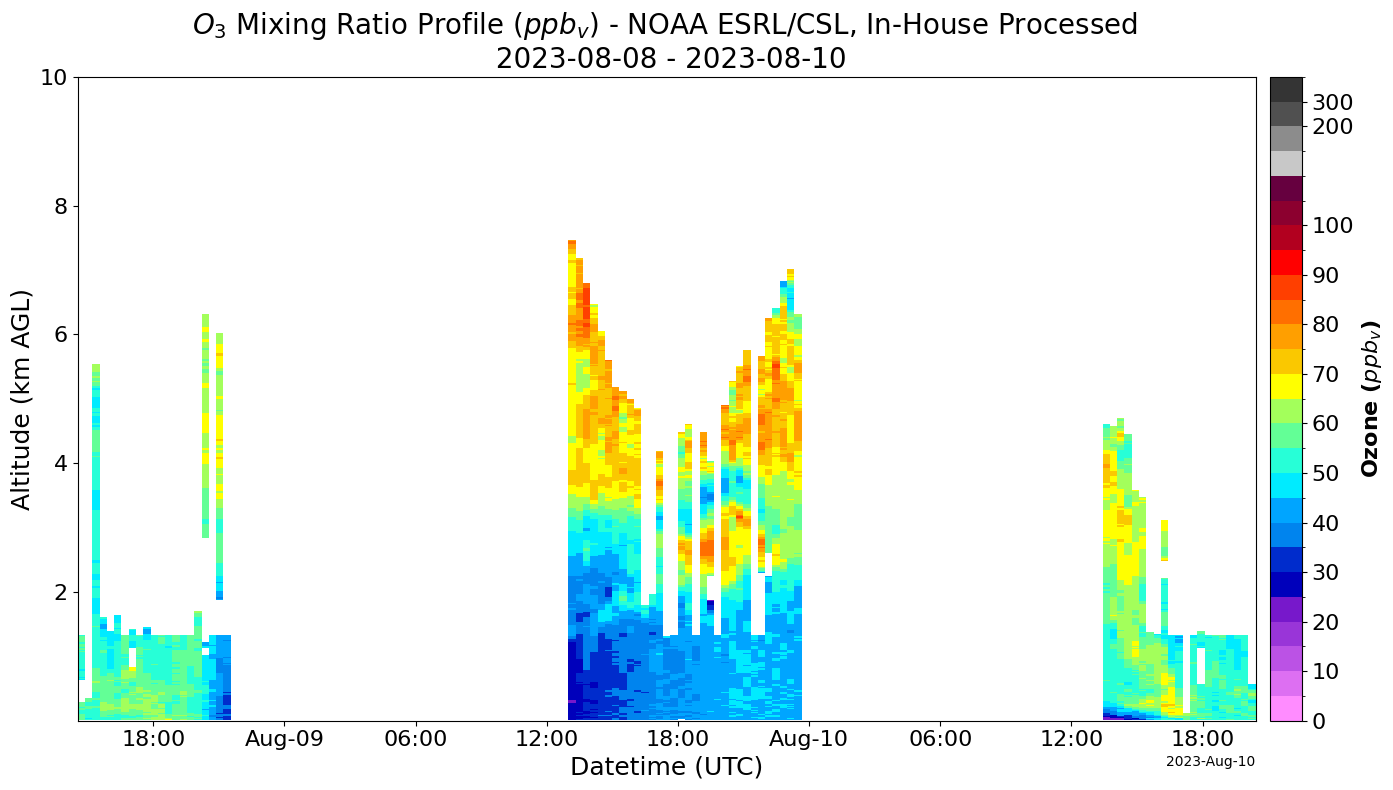

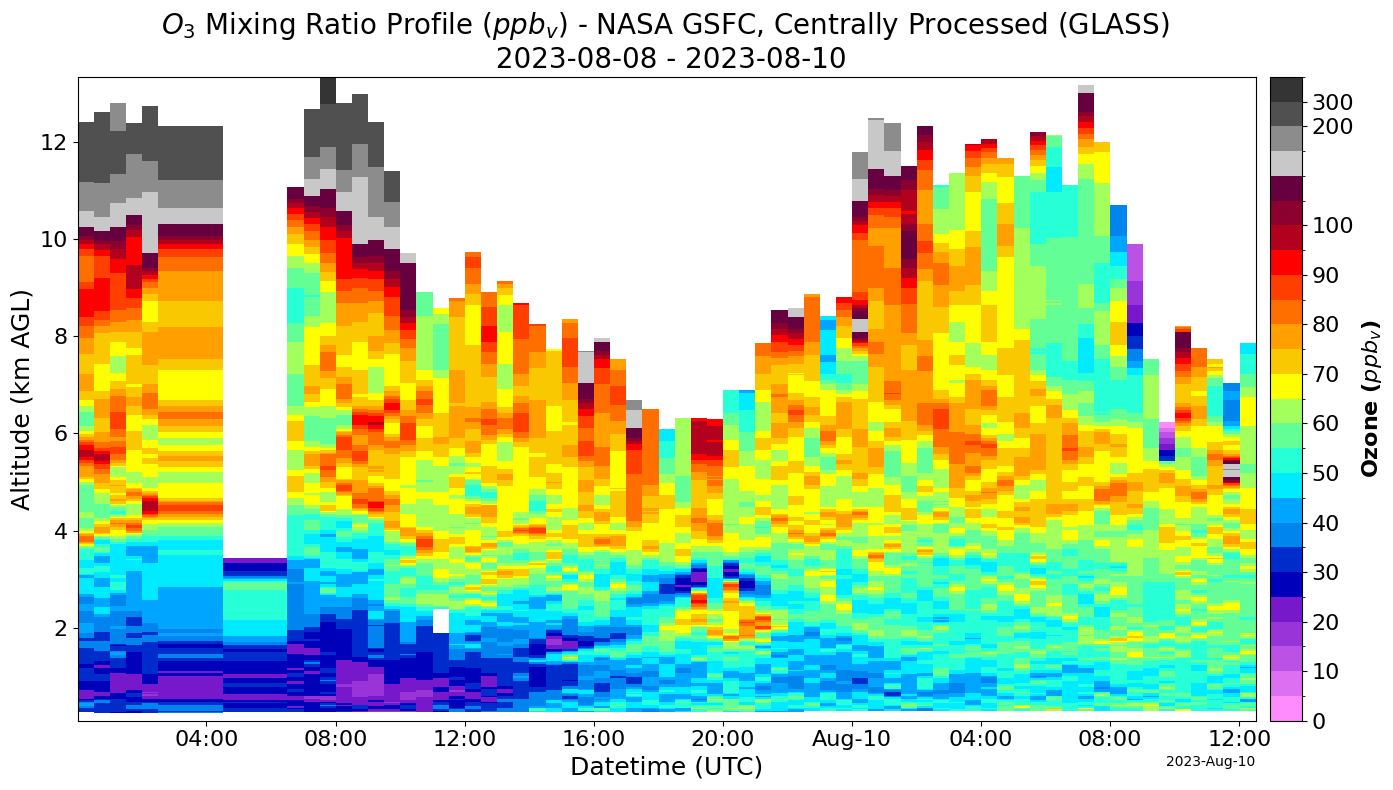

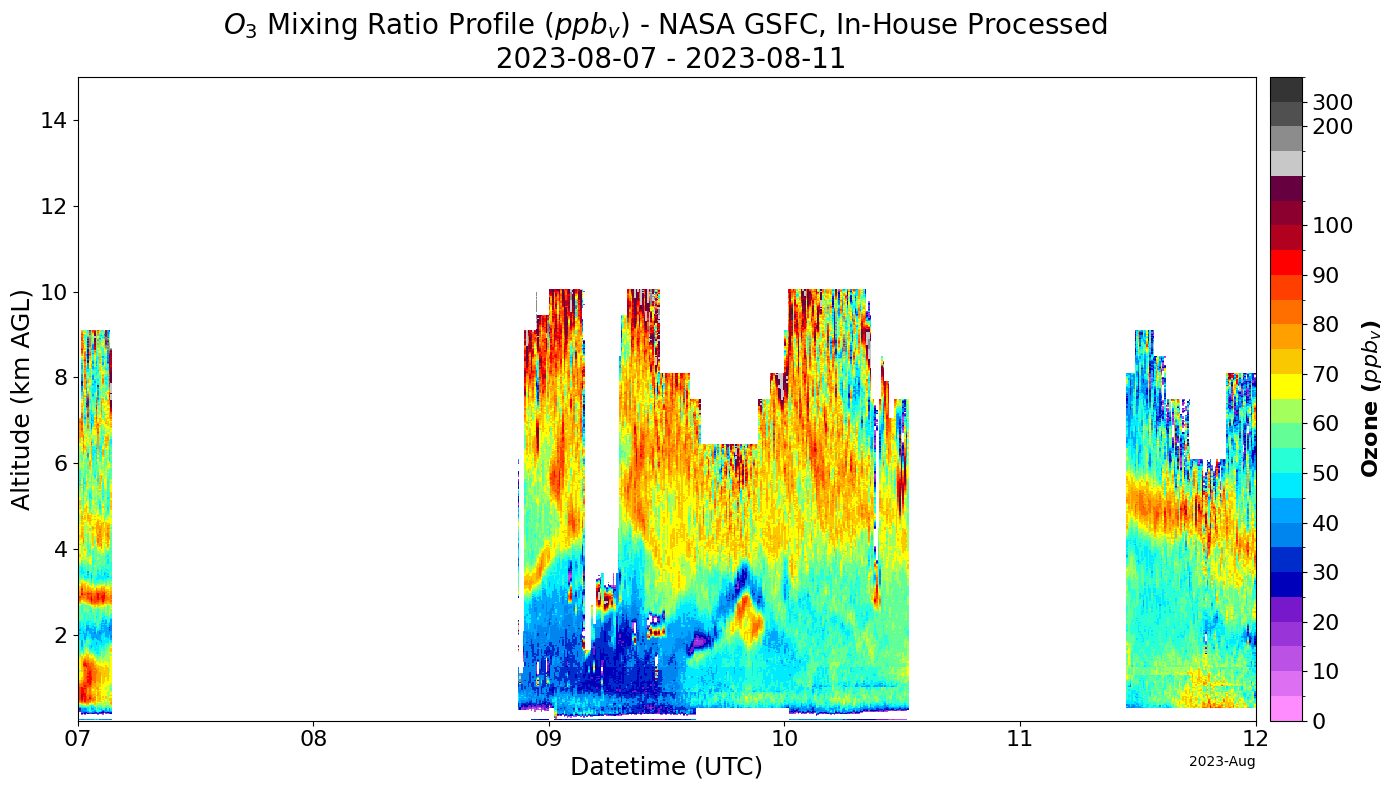

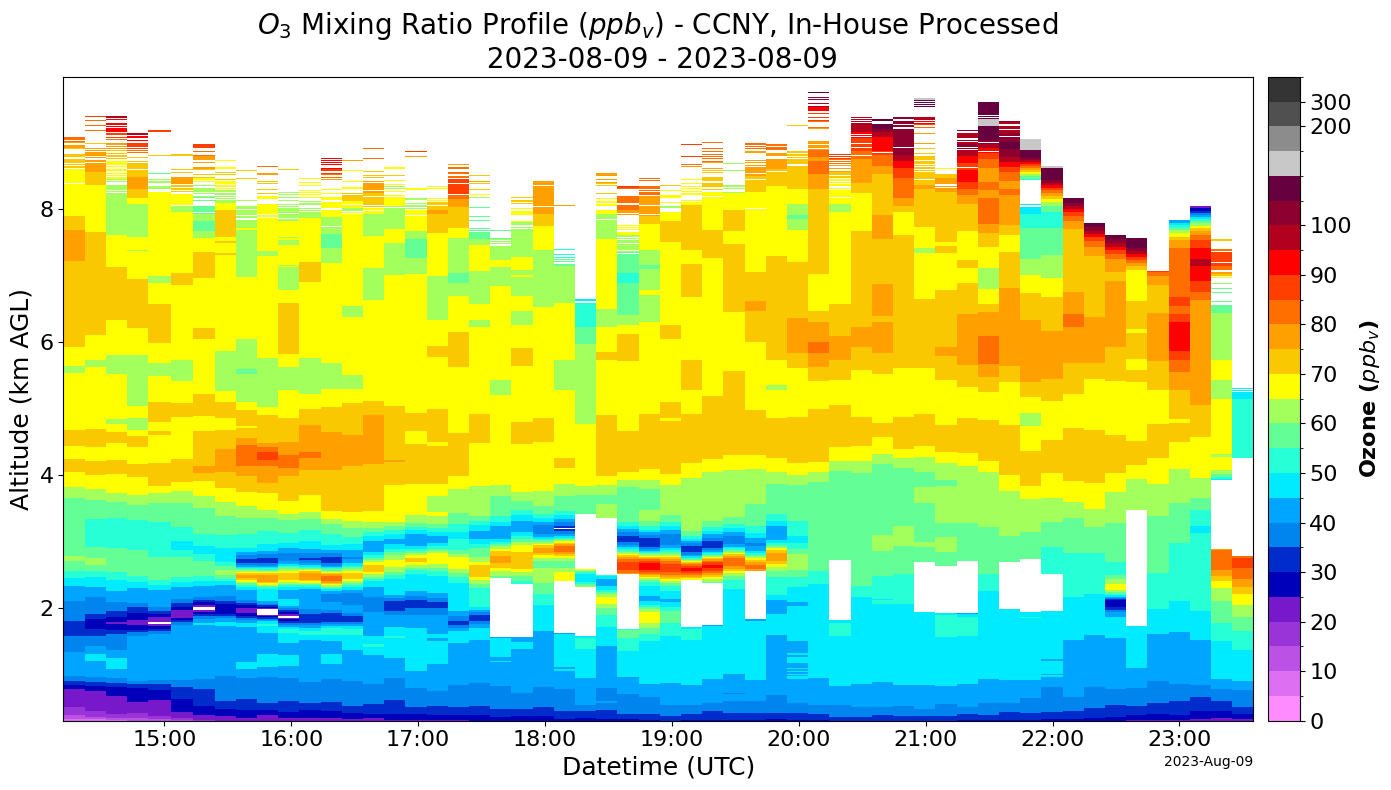

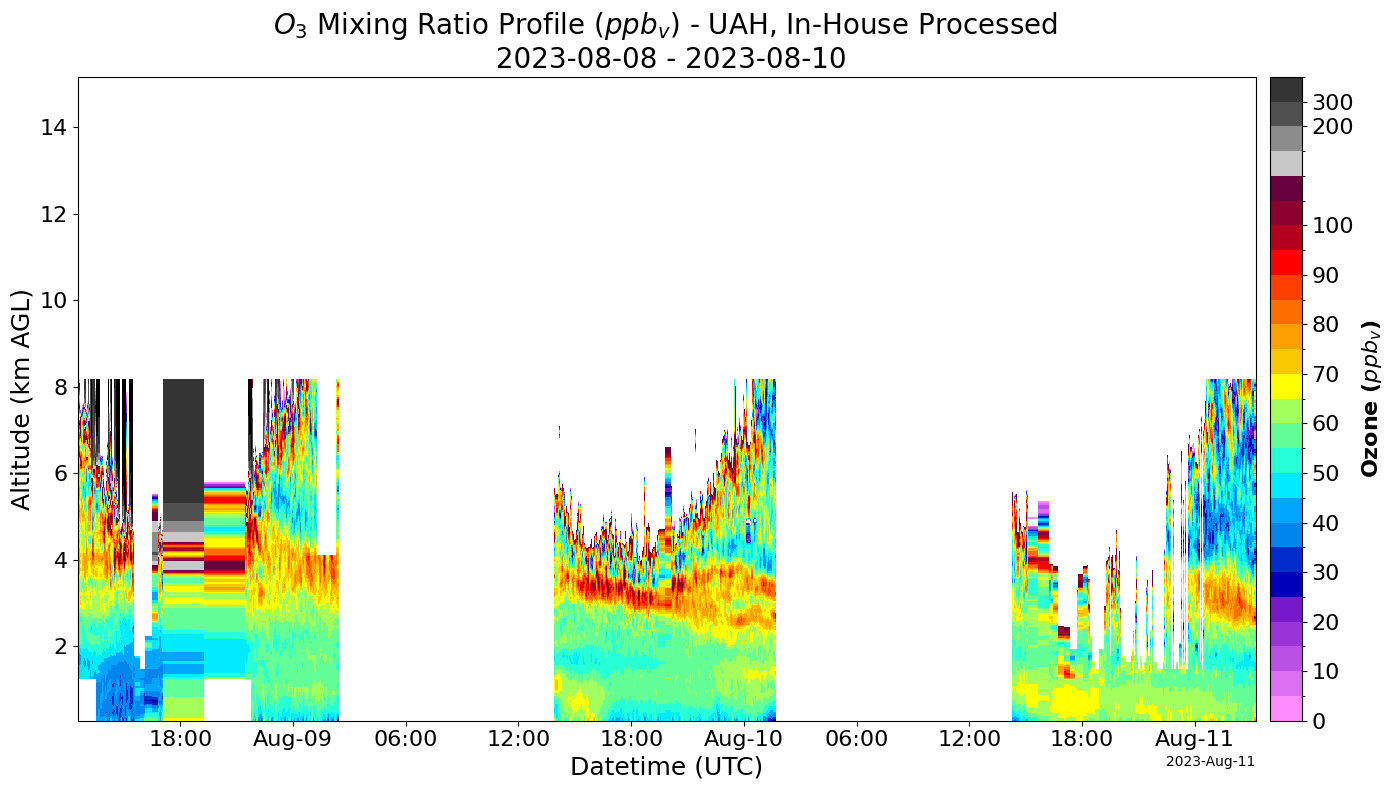

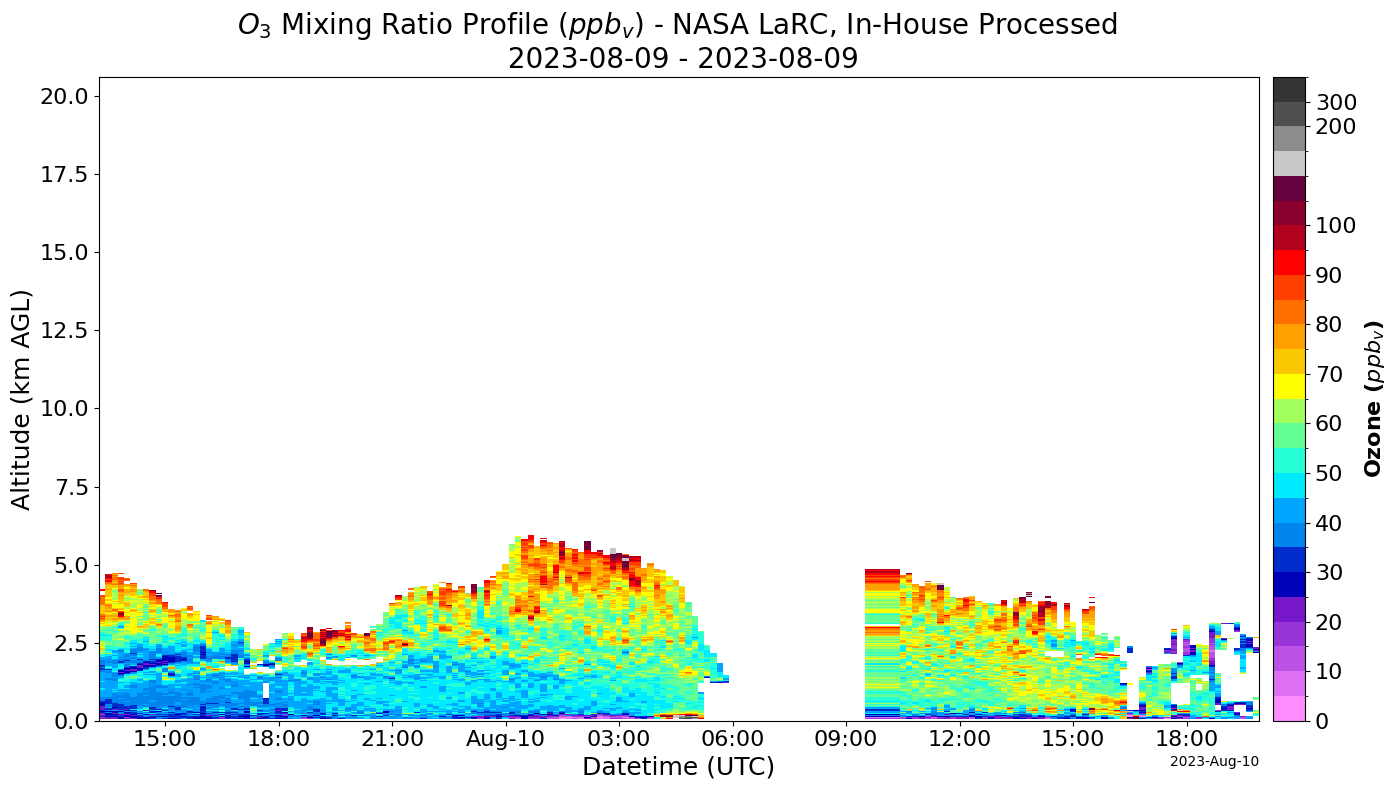

In [11]:
# Plots the data, used after import_data. Puts each combination of instrument group and processing type on a seperate plot.
data.tolnet_curtains()

## Plotting a specific lidar <a class="anchor" id="specific_lidar_graph"></a>

In [14]:
from TOLNET_DEMO.tolnet import TOLNet
tolnet = TOLNet()

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:37<00:00,  4.70s/it]
C:\Users\arthu\Documents\NASA\TOLNET_Summer\TOLNET_DEMO\tolnet.py:400: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  self.data[key][filename] = self.data[key][filename].fillna(value=np.nan)


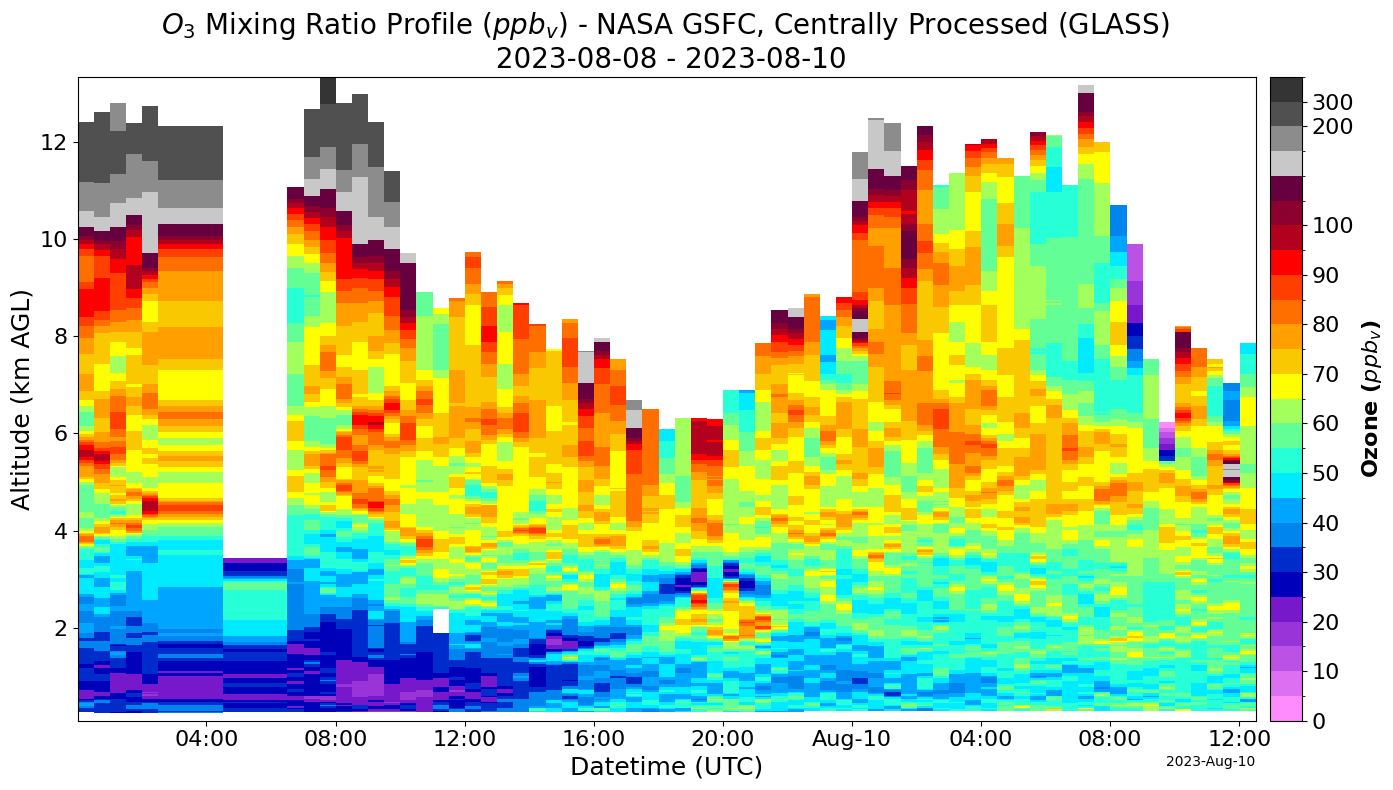

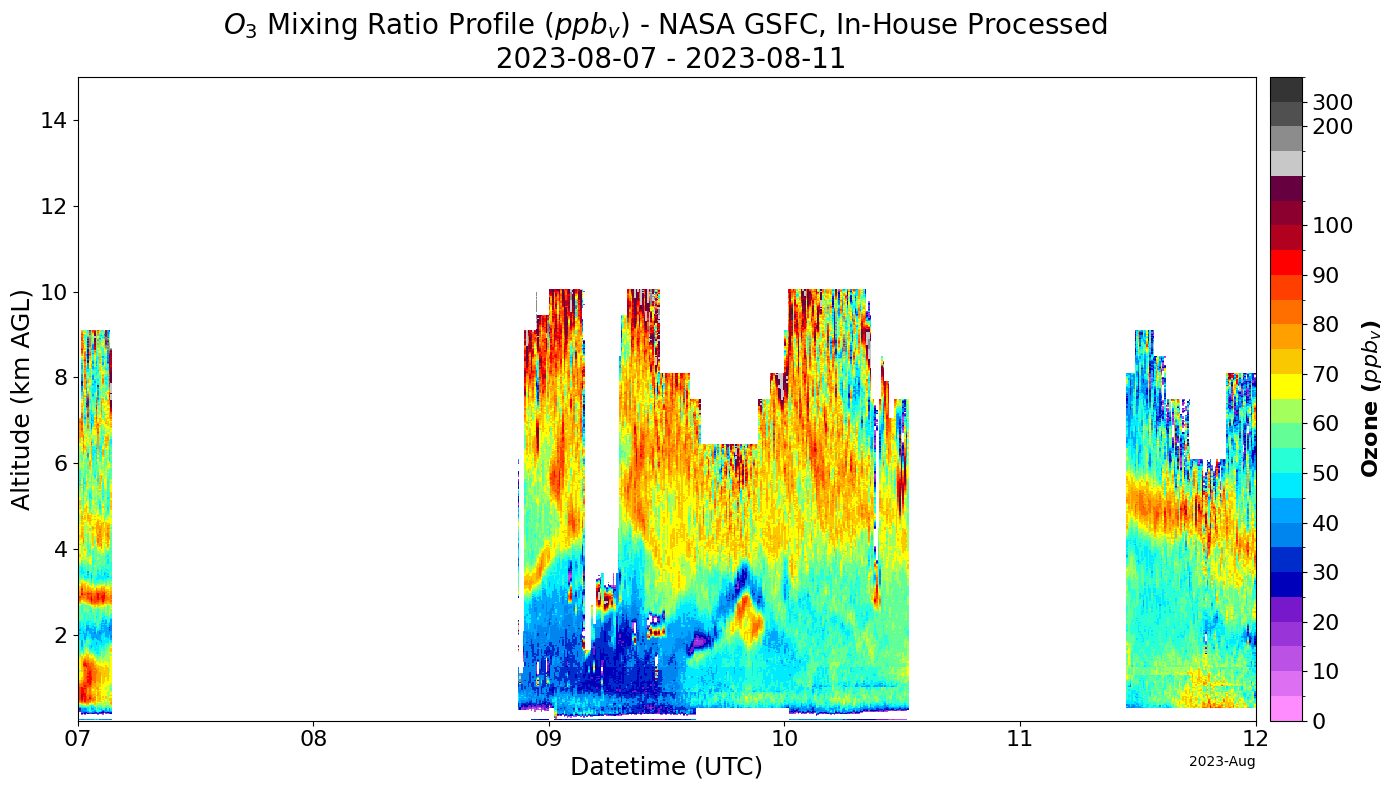

In [15]:
date_start = "2023-08-08"
date_end = "2023-08-11"
product_IDs = [4] # HIRES
lidar_group = [2] # NASA GSFC
data = tolnet.import_data(min_date=date_start, max_date=date_end, product_type=product_IDs, instrument_group=lidar_group)
data.tolnet_curtains()

## Additional parameters for plotting <a class="anchor" id="additional_specifications"></a>

Additional parameters can be used: title, ylabel, xlabel(axis labels), xlims, ylims, yticks, surface, sonde, and savefig.  
title, ylabel, and xlabel take strings.  
xlims takes a list of two dates in ISO 8601 Format(YYYY-MM-DD), like this: ['2023-08-05', '2023-08-08'].  
surface and Sonde plot their respective datas instead.  
savefig=True saves each figure to a file. Each each figure is saved in a file named (Instrment Group)_(Processing type)_(Start date)_(End date).png.

## Accessing data directly <a class="anchor" id="direct_access"></a>

In [6]:
# The data can also be accessed directly from the object.
tolnet.data.keys() # Returns each combination of instrument group and processing type that there is data for.



dict_keys([('NOAA ESRL/CSL', 'In-House Processed'), ('NASA GSFC', 'Centrally Processed (GLASS)'), ('NASA GSFC', 'In-House Processed'), ('CCNY', 'In-House Processed'), ('UAH', 'In-House Processed'), ('NASA LaRC', 'In-House Processed')])

In [7]:
sample_key = list(tolnet.data.keys())[0]
tolnet.data[sample_key].keys() # Returns each filename with the specified group and type.



dict_keys(['groundbased_lidar.o3_noaa.csl001_hires_guilford.ycfs.ct_20230810t132532z_20230810t202532z_002.hdf', 'groundbased_lidar.o3_noaa.csl001_hires_guilford.ycfs.ct_20230809t125923z_20230809t233923z_002.hdf', 'groundbased_lidar.o3_noaa.csl001_hires_guilford.ycfs.ct_20230808t143232z_20230808t215232z_002.hdf'])

In [8]:
sample_file = list(tolnet.data[sample_key].keys())[0]
tolnet.data[sample_key][sample_file] # Returns a DataFrame containing the data for that file.

,0.0045,0.0095,0.0145,0.0195,0.0245,0.0295,0.0345,0.0395,0.0445,0.0495,...,9.9545,9.9595,9.9645,9.9695,9.9745,9.9795,9.9845,9.9895,9.9945,9.9995
2023-08-10 13:35:32+00:00,NaN,NaN,22.0,23.5,23.2,22.1,24.4,24.6,26.5,26.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-10 13:55:32+00:00,NaN,NaN,20.3,21.5,21.2,23.4,23.6,27.0,27.8,26.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-10 14:15:32+00:00,NaN,NaN,24.1,22.1,23.4,22.4,22.6,25.4,28.4,29.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-10 14:35:32+00:00,NaN,NaN,27.8,29.0,30.4,28.6,30.2,33.3,35.8,32.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-10 14:55:32+00:00,NaN,NaN,33.1,33.4,33.7,31.1,29.8,33.0,36.5,37.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-10 15:15:32+00:00,NaN,NaN,33.8,34.5,33.1,34.3,35.2,35.7,36.6,36.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-10 15:35:32+00:00,NaN,NaN,36.2,40.4,38.8,41.7,46.0,43.4,40.8,38.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-10 15:55:32+00:00,NaN,NaN,41.1,46.3,43.6,43.8,48.4,47.5,45.7,43.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-10 16:15:32+00:00,NaN,NaN,50.4,52.8,48.2,49.9,50.2,49.7,51.1,48.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-10 16:35:32+00:00,NaN,NaN,54.7,53.1,54.9,55.1,49.5,51.4,51.1,52.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
tolnet.meta_data[sample_key][sample_file].keys() # Returns a dictionary containing that file's metadata.

dict_keys(['fileInfo', 'altitude', 'datetime', 'value', 'id', 'file_name', 'attributes', 'LATITUDE.INSTRUMENT', 'LONGITUDE.INSTRUMENT'])